Markdown basics (http://daringfireball.net/projects/markdown/basics)
# NY Taxi Rides

### Data Provided by the New York City Taxi and Limousine Commission.
Full dataset is 170 million taxi trips, 100GB of free space. Our subset is 0.5% of all trips, about 850,000 rides. Download the dataset from Cyrille Rossant on GitHub: https://github.com/ipython-books/minibook-2nd-data (https://github.com/ipython-books/minibook-2nd-data) NYC Taxi & Limousine Commission website (http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml) NYC Gov data description website (http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
#put your path here.

data_filename = '/Users/aston/Desktop/CU2020Spring/5210 Python/pd taxi/' 

In [3]:
data = pd.read_csv('nyc_data.csv', 
                   parse_dates=['pickup_datetime', 'dropoff_datetime'] )
#pd.read_csv?

head() method of DataFrames displays the first three lines of the table

In [4]:
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,-73.991432,40.755081,-73.991417,40.755085
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,40.773716,-73.955399,40.782597


## There are 846945 rows, and 14 columns

In [5]:
#number of rows
data['rate_code'].count()
data.shape

(846945, 14)

## Pandas dataframe variable types

In [6]:
data.dtypes

medallion                     object
hack_license                  object
vendor_id                     object
rate_code                      int64
store_and_fwd_flag            object
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
trip_time_in_secs              int64
trip_distance                float64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
dtype: object

Get the actual coordinates: four DataFrame columns
These four variables are all Series objects:

# Parametric statistics

In [7]:
data.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,846945.000000,846945.000000,8.469450e+05,8.469450e+05,846945.000000,846945.000000,846945.000000,846945.000000
mean,1.026123,1.710272,8.125239e+02,9.958211e+00,-73.975155,40.750490,-73.974197,40.750967
std,0.223480,1.375266,1.609831e+04,6.525205e+03,0.035142,0.027224,0.033453,0.030766
min,0.000000,0.000000,-1.000000e+01,0.000000e+00,-74.098305,40.009911,-74.099998,40.009911
25%,1.000000,1.000000,3.610000e+02,1.050000e+00,-73.992371,40.736031,-73.991570,40.735207
50%,1.000000,1.000000,6.000000e+02,1.800000e+00,-73.982094,40.752975,-73.980614,40.753597
75%,1.000000,2.000000,9.600000e+02,3.200000e+00,-73.968048,40.767460,-73.965157,40.768227
max,6.000000,6.000000,4.294796e+06,6.005123e+06,-73.028473,40.996132,-73.027061,40.998592


# Categorical variable frequencies

In [8]:
data.head(5)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,-73.991432,40.755081,-73.991417,40.755085
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,40.773716,-73.955399,40.782597


In [9]:
series_vid = pd.Series(data['vendor_id'])
series_vid.value_counts()

CMT    424678
VTS    422267
Name: vendor_id, dtype: int64

In [10]:
series_store = pd.Series(data['store_and_fwd_flag'])
series_store.value_counts()

N    414599
Y      9978
Name: store_and_fwd_flag, dtype: int64

In [11]:
p_lng = data.pickup_longitude
p_lat = data.pickup_latitude
d_lng = data.dropoff_longitude
d_lat = data.dropoff_latitude

In [12]:
# a Series is an indexed list of values.
p_lng.head()

0   -73.955925
1   -74.005501
2   -73.969955
3   -73.991432
4   -73.966225
Name: pickup_longitude, dtype: float64

In [13]:
d_lng.head()

0   -73.963181
1   -73.964943
2   -73.954567
3   -73.991417
4   -73.955399
Name: dropoff_longitude, dtype: float64

In [14]:
# Get the coordinates of points in pixels from geographical coordinates.
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [15]:
# Get pickup coordinates from pickup latitude and longitude
px, py = lat_lng_to_pixels(p_lat, p_lng)
py.head()

0   -37.572749
1   -37.586007
2   -37.566187
3   -37.582580
4   -37.575746
Name: pickup_latitude, dtype: float64

In [16]:
dx, dy = lat_lng_to_pixels(d_lat, d_lng)
dy.head()

0   -37.574236
1   -37.582345
2   -37.570729
3   -37.582579
4   -37.572488
Name: dropoff_latitude, dtype: float64

Display a scatter plot of pickup locations
Matplotlib scatter function makes a scatter plot of x vs y, where x and y are sequence like objects of the same
length.
Documentation: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
(http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)

## Display a scatter plot

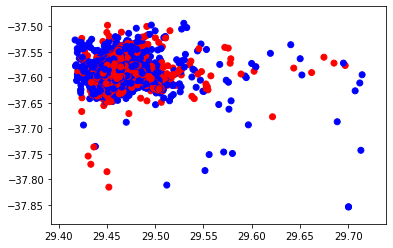

In [17]:
colors = {'VTS':'red','CMT':'blue'}
plt.scatter(px, py, color=data['vendor_id'].apply(lambda x: colors[x]))

## CMT would be easier vendor to find a cab, slightly

In [18]:
series_vendorid = pd.Series(data['vendor_id']).value_counts()
series_vendorid

CMT    424678
VTS    422267
Name: vendor_id, dtype: int64

### Customize our plot:
- Make markers smaller
- Make fewer points by making some points transparent
- Zoom in around Manhattan
- Make figure bigger
- Don't display the axes

plt or matplotlib.pyplot is a collection of command style functions. Each pyplot function makes some change to
a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates
the plot with labels, etc. ...

(29.4, 29.55, -37.63, -37.54)

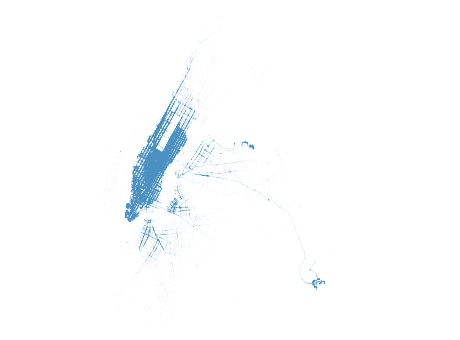

In [19]:
# Specify the figure size
plt.figure(figsize=(8, 6))
# s argument is used to make the marker size smaller
# alpha specifies opacity
plt.scatter(px, py, s=.1, alpha=0.03)
# equal aspect ratio
plt.axis('equal')
# zoom in
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
# remove the axes
plt.axis('off')

## Display a histogram of the trip distances.
pandas Series hist() draws histogram of the input Series using Matplotlib: documentation
(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html).

Manhattan Island is 13.4 miles long and 2.3 miles wide.

What is a histogram? (https://statistics.laerd.com/statistical-guides/understanding-histograms.php)
numpy linspace() returns evenly spaced numbers over a specified interval.
Parameters: start - interval start; stop - interval stop; num - number of numbers. numpy linspace()
documentation (https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)


In [20]:
bin_array = np.linspace(start=0., stop=10., num=100)
bin_array

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

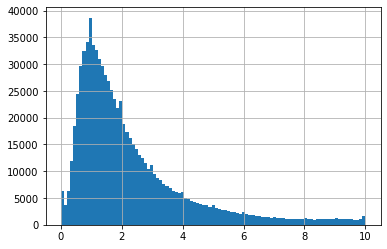

In [21]:
data.trip_distance.hist(bins=bin_array)

## Top 5 most common trip distance

In [22]:
data.trip_distance.value_counts().head(5).rename('trip_distance_frequency')

1.0    21815
0.9    18915
0.8    18449
1.1    18263
1.2    17823
Name: trip_distance_frequency, dtype: int64

## Histogram of fare total amounts

In [23]:
datafare = pd.read_csv('nyc_fare.csv')
datafare.head(5)

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,2013-01-01 00:00:00,CSH,5.0,0.5,0.5,0.0,0.0,6.0
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,2013-01-01 00:05:00,CRD,13.5,0.5,0.5,2.8,0.0,17.3
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,2013-01-01 00:05:52,CSH,7.5,0.5,0.5,0.0,0.0,8.5
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,2013-01-01 00:06:00,CSH,2.5,0.5,0.5,0.0,0.0,3.5
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,2013-01-01 00:06:00,CSH,6.5,0.5,0.5,0.0,0.0,7.5


(array([1.0000e+00, 1.2250e+03, 7.4300e+03, 1.0620e+04, 3.8190e+04,
        3.0372e+04, 6.2126e+04, 4.2407e+04, 4.5930e+04, 6.4894e+04,
        3.7676e+04, 5.6865e+04, 3.6533e+04, 4.9023e+04, 2.5573e+04,
        3.5928e+04, 2.1061e+04, 2.2579e+04, 2.8958e+04, 1.5003e+04,
        2.0119e+04, 1.1894e+04, 1.7916e+04, 1.1420e+04, 1.3257e+04]),
 array([ 2.  ,  2.72,  3.44,  4.16,  4.88,  5.6 ,  6.32,  7.04,  7.76,
         8.48,  9.2 ,  9.92, 10.64, 11.36, 12.08, 12.8 , 13.52, 14.24,
        14.96, 15.68, 16.4 , 17.12, 17.84, 18.56, 19.28, 20.  ]),
 <a list of 25 Patch objects>)

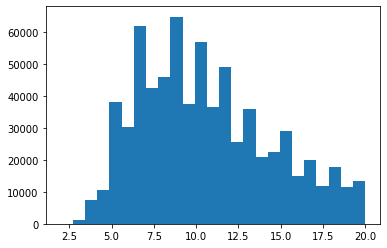

In [24]:
total_fare_v = datafare['total_amount']
plt.hist(total_fare_v, bins = 25, range= [2, 20], align= 'mid')

## Comment: According to total_fare_amount, most of the trips were 6dollars to 11dollars. However, the dataset is also positively skewed. More fares were above the average than below the average. 

## Filtering with boolean indexing
### Select long rides

data.loc[data.trip_distance > 100]

In [25]:
data.loc[data.trip_distance > 100]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
504497,7237EC7ABD6114EDDC87A3AA846F8418,D52502537E2DF62C9BFFECF5A387E7E9,CMT,1,N,2013-08-02 11:22:31,2013-08-02 11:33:03,1,631,6005123.0,-73.997467,40.736397,-73.991882,40.764629
507107,50DA72F510E2F84A42712E13744FAC7B,EA9D03A766C1D32A6668FFF0C1EB4E4B,CMT,1,N,2013-08-04 18:42:17,2013-08-04 20:37:19,3,4290965,181.8,-73.978020,40.765167,-73.815041,40.730076
548988,A978A0AAE9B2CFEE310FACD97A09C319,CE56A27F53ABF411094B6CD708BFBA96,CMT,1,N,2013-08-24 17:03:27,2013-08-24 17:03:29,1,1,442.0,-73.993896,40.702644,-73.993874,40.702637
558665,5A5C516A820FE476E9D3E14101B669AC,C24585AA866FC76A4E09A05F55DC7E54,CMT,2,N,2013-08-29 10:01:40,2013-08-29 11:52:20,1,6640,164.4,-73.791534,40.661026,-73.983734,40.765778


## There are 4 unusually long trips

In [26]:
data.loc[data.trip_distance > 100].count()

medallion             4
hack_license          4
vendor_id             4
rate_code             4
store_and_fwd_flag    4
pickup_datetime       4
dropoff_datetime      4
passenger_count       4
trip_time_in_secs     4
trip_distance         4
pickup_longitude      4
pickup_latitude       4
dropoff_longitude     4
dropoff_latitude      4
dtype: int64

In [27]:
#end